<a href="https://colab.research.google.com/github/KhangTruong220162/Dynamic-Macro-Notes/blob/main/Population_Aging_Group_Dynamic_Economics_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal Fertility: 1.240
Optimal Savings: 0.056
Consumption when Young: 0.372
Consumption when Old: 0.364


<ipython-input-1-25987f8afe63>:57: RuntimeWarning: invalid value encountered in log
  U = np.log(CA) + beta * pi * np.log(CO) + gamma * np.log(N)


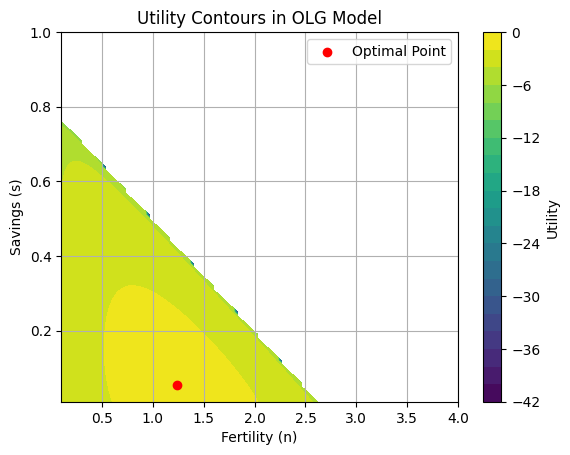

In [ ]:
#@title OLG Model with Endogenous Fertility, No Disutility from Labor
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# Parameters
beta = 0.95       # Discount factor
gamma = 1.0       # Preference for children
pi = 0.9          # Survival probability
theta = 0.2       # Pension tax rate
q = 0.3           # Child-rearing cost (fraction of income)
w = 1.0           # Wage
R = 1.03          # Interest rate
p = 0.3           # Pension payout
# Utility function
def utility(ca, co, n):
    if ca <= 0 or co <= 0 or n <= 0:
        return -np.inf
    return np.log(ca) + beta * pi * np.log(co) + gamma * np.log(n)
# Budget constraints
def budget_constraints(x):
    n, s = x
    ca = w * (1 - theta) - s - q * w * n
    co = (R * s) / pi + p
    return -utility(ca, co, n)
# Constraints: non-negativity
bounds = [(1e-4, None),  # Fertility must be > 0
          (1e-4, None)]  # Savings must be > 0
# Initial guess: [n, s]
x0 = [1.5, 0.2]
# Optimization
result = minimize(budget_constraints, x0, bounds=bounds)
# Output
if result.success:
    n_opt, s_opt = result.x
    ca_opt = w * (1 - theta) - s_opt - q * w * n_opt
    co_opt = (R * s_opt) / pi + p
    print(f"Optimal Fertility: {n_opt:.3f}")
    print(f"Optimal Savings: {s_opt:.3f}")
    print(f"Consumption when Young: {ca_opt:.3f}")
    print(f"Consumption when Old: {co_opt:.3f}")
else:
    print("Optimization failed")
# Plot utility contours (optional)
n_vals = np.linspace(0.1, 4, 100)
s_vals = np.linspace(0.01, 1.0, 100)
N, S = np.meshgrid(n_vals, s_vals)
CA = w * (1 - theta) - S - q * w * N
CO = (R * S) / pi + p
U = np.log(CA) + beta * pi * np.log(CO) + gamma * np.log(N)
U[CA <= 0] = np.nan
U[CO <= 0] = np.nan

plt.contourf(N, S, U, levels=20, cmap='viridis')
plt.colorbar(label='Utility')
plt.scatter(n_opt, s_opt, color='red', label='Optimal Point')
plt.xlabel("Fertility (n)")
plt.ylabel("Savings (s)")
plt.title("Utility Contours in OLG Model")
plt.legend()
plt.grid(True)
plt.show()

Optimal Savings: 0.254
Young Consumption: 0.546
Old Consumption: 0.535
Steady-state Pension Benefit: 0.244


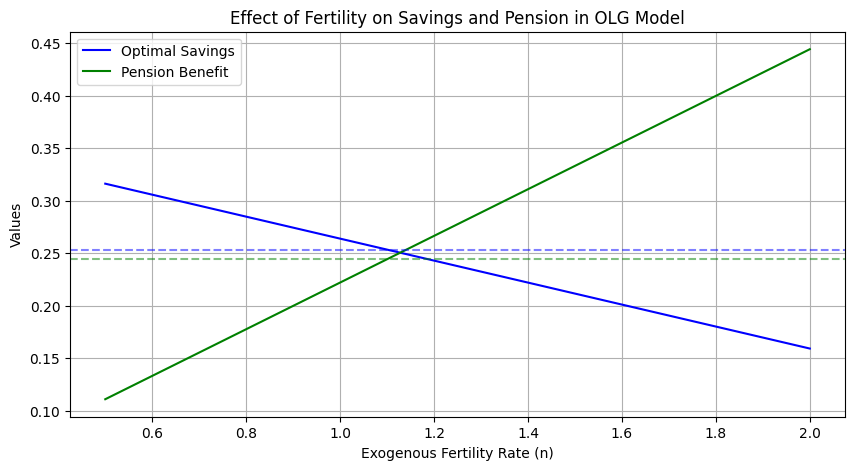

In [ ]:
#@title OLG Model with Exogenous Fertility and Inelastic Labor
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# Parameters
beta = 0.95       # Discount factor
pi = 0.9          # Survival probability
theta = 0.2       # Pension contribution rate
n = 1.1           # Exogenous fertility rate
w = 1.0           # Wage
R = 1.03          # Interest rate
# Pension from PAYG system
p = (theta * w * n) / pi
# Utility function (no fertility utility term since fertility is exogenous)
def utility(ca, co):
    if ca <= 0 or co <= 0:
        return -np.inf
    return np.log(ca) + beta * pi * np.log(co)
# Budget constraints (young and old)
def budget_constraints(s):
    ca = (1 - theta) * w - s
    co = (R * s) / pi + p
    return -utility(ca, co)
# Optimization: Choose savings s to maximize utility
s_init = 0.2
bounds = [(1e-4, (1 - theta) * w - 1e-4)]

result = minimize(budget_constraints, [s_init], bounds=bounds)
# Results
if result.success:
    s_opt = result.x[0]
    ca_opt = (1 - theta) * w - s_opt
    co_opt = (R * s_opt) / pi + p
    print(f"Optimal Savings: {s_opt:.3f}")
    print(f"Young Consumption: {ca_opt:.3f}")
    print(f"Old Consumption: {co_opt:.3f}")
    print(f"Steady-state Pension Benefit: {p:.3f}")
else:
    print("Optimization failed")
# Sensitivity analysis: vary n and see effect on pensions and savings
n_vals = np.linspace(0.5, 2.0, 100)
s_vals, p_vals = [], []

for n_val in n_vals:
    p_val = (theta * w * n_val) / pi
    def u_fn(s):
        ca = (1 - theta) * w - s
        co = (R * s) / pi + p_val
        return -utility(ca, co)

    res = minimize(u_fn, [s_init], bounds=bounds)
    if res.success:
        s_vals.append(res.x[0])
        p_vals.append(p_val)
    else:
        s_vals.append(np.nan)
        p_vals.append(np.nan)
# Plot
plt.figure(figsize=(10, 5))
plt.plot(n_vals, s_vals, label='Optimal Savings', color='blue')
plt.plot(n_vals, p_vals, label='Pension Benefit', color='green')
plt.axhline(y=s_opt, color='blue', linestyle='--', alpha=0.5)
plt.axhline(y=p, color='green', linestyle='--', alpha=0.5)
plt.xlabel("Exogenous Fertility Rate (n)")
plt.ylabel("Values")
plt.title("Effect of Fertility on Savings and Pension in OLG Model")
plt.legend()
plt.grid(True)
plt.show()

=== Optimal Household Decisions ===
Fertility (n): 1.703
Savings (s): 0.010
Consumption (young): 0.279
Consumption (old): 0.390
Pension Benefit (p): 0.378


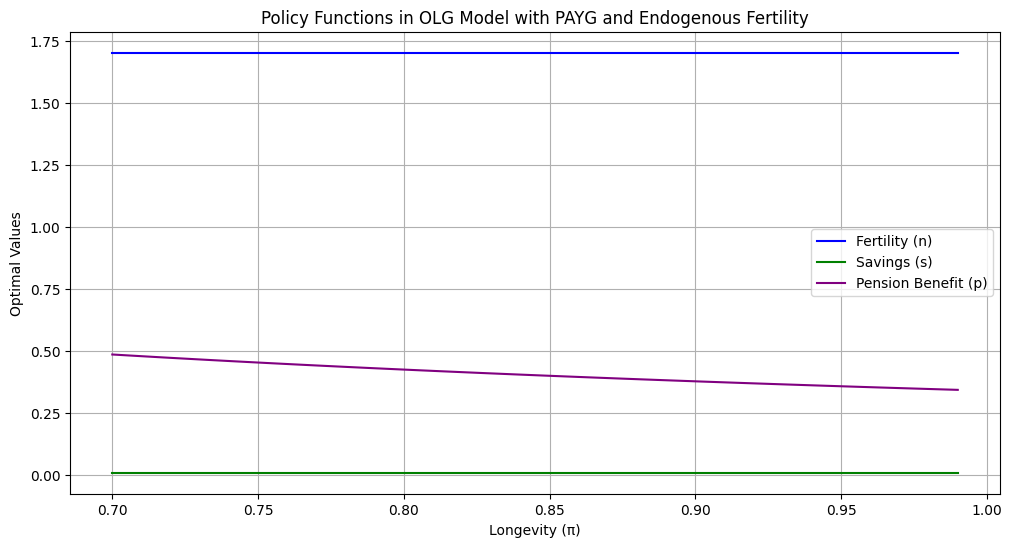

In [ ]:
#@title Final OLG Model: PAYG + Endogenous Fertility
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# Model parameters
beta = 0.95       # Time preference
gamma = 1.0       # Preference for children
pi = 0.9          # Longevity (survival probability)
theta = 0.2       # Pension tax rate
w = 1.0           # Wage
R = 1.03          # Interest rate
q = 0.3           # Cost per child (fraction of income)
# Utility function
def utility(ca, co, n):
    if ca <= 0 or co <= 0 or n <= 0:
        return -np.inf
    return np.log(ca) + beta * pi * np.log(co) + gamma * np.log(n)
# Household optimization problem
def household_objective(x):
    n, s = x
    p = (theta * w * n) / pi
    ca = w * (1 - theta) - s - q * w * n
    co = (R * s) / pi + p
    return -utility(ca, co, n)
# Constraints: n > 0, s > 0
bounds = [(0.01, 5),  # Fertility
          (0.01, w * (1 - theta) - 0.01)]  # Savings
# Initial guess
x0 = [1.5, 0.2]
# Optimize
res = minimize(household_objective, x0, bounds=bounds)
# Extract results
if res.success:
    n_star, s_star = res.x
    p_star = (theta * w * n_star) / pi
    ca_star = w * (1 - theta) - s_star - q * w * n_star
    co_star = (R * s_star) / pi + p_star
    print("=== Optimal Household Decisions ===")
    print(f"Fertility (n): {n_star:.3f}")
    print(f"Savings (s): {s_star:.3f}")
    print(f"Consumption (young): {ca_star:.3f}")
    print(f"Consumption (old): {co_star:.3f}")
    print(f"Pension Benefit (p): {p_star:.3f}")
else:
    print("Optimization failed")
# Sensitivity analysis over longevity (pi)
pi_vals = np.linspace(0.7, 0.99, 100)
n_vals, s_vals, p_vals = [], [], []

for pi_i in pi_vals:
    def obj(x):
        n, s = x
        p = (theta * w * n) / pi_i
        ca = w * (1 - theta) - s - q * w * n
        co = (R * s) / pi_i + p
        return -utility(ca, co, n)
    result = minimize(obj, x0, bounds=bounds)
    if result.success:
        n_opt, s_opt = result.x
        n_vals.append(n_opt)
        s_vals.append(s_opt)
        p_vals.append((theta * w * n_opt) / pi_i)
    else:
        n_vals.append(np.nan)
        s_vals.append(np.nan)
        p_vals.append(np.nan)
# Plotting the policy functions
plt.figure(figsize=(12, 6))
plt.plot(pi_vals, n_vals, label='Fertility (n)', color='blue')
plt.plot(pi_vals, s_vals, label='Savings (s)', color='green')
plt.plot(pi_vals, p_vals, label='Pension Benefit (p)', color='purple')
plt.xlabel("Longevity (π)")
plt.ylabel("Optimal Values")
plt.title("Policy Functions in OLG Model with PAYG and Endogenous Fertility")
plt.legend()
plt.grid(True)
plt.show()

This study extends the two-period overlapping generations (OLG) model of Cipriani (2013) by simulating household decision-making under a pay-as-you-go (PAYG) pension system. In our setup, individuals supply one unit of labor inelastically when young, receive a wage
𝑤
w, and must allocate resources between consumption, savings
𝑠
s, and fertility
𝑛
n, while anticipating retirement. A proportional labor income tax
𝜃
θ funds pensions for the elderly. Importantly, we explore the effects of introducing child-rearing costs and policy interventions—such as child-rearing subsidies—on optimal household behavior and pension system sustainability.

The household maximizes expected lifetime utility given by:

𝑈
=
ln
⁡
(
𝑐
𝑎
)
+
𝛽
𝜋
ln
⁡
(
𝑐
𝑜
)
+
𝛾
ln
⁡
(
𝑛
)
U=ln(c
a
​
 )+βπln(c
o
​
 )+γln(n)
where
𝑐
𝑎
=
𝑤
(
1
−
𝜃
)
−
𝑠
−
𝑞
𝑤
𝑛
c
a
​
 =w(1−θ)−s−qwn is consumption when young,
𝑐
𝑜
=
𝑅
𝑠
𝜋
+
𝑝
c
o
​
 =
π
Rs
​
 +p is old-age consumption, and
𝑝
=
𝜃
𝑤
𝑛
𝜋
p=
π
θwn
​
  is the PAYG pension benefit received in retirement. Here,
𝜋
π denotes the probability of survival to old age, and
𝑞
q represents the child-rearing cost as a proportion of income. Fertility
𝑛
n and savings
𝑠
s are chosen optimally by the household. We consider two cases: with child-rearing costs (
𝑞
>
0
q>0) and without (
𝑞
=
0
q=0).


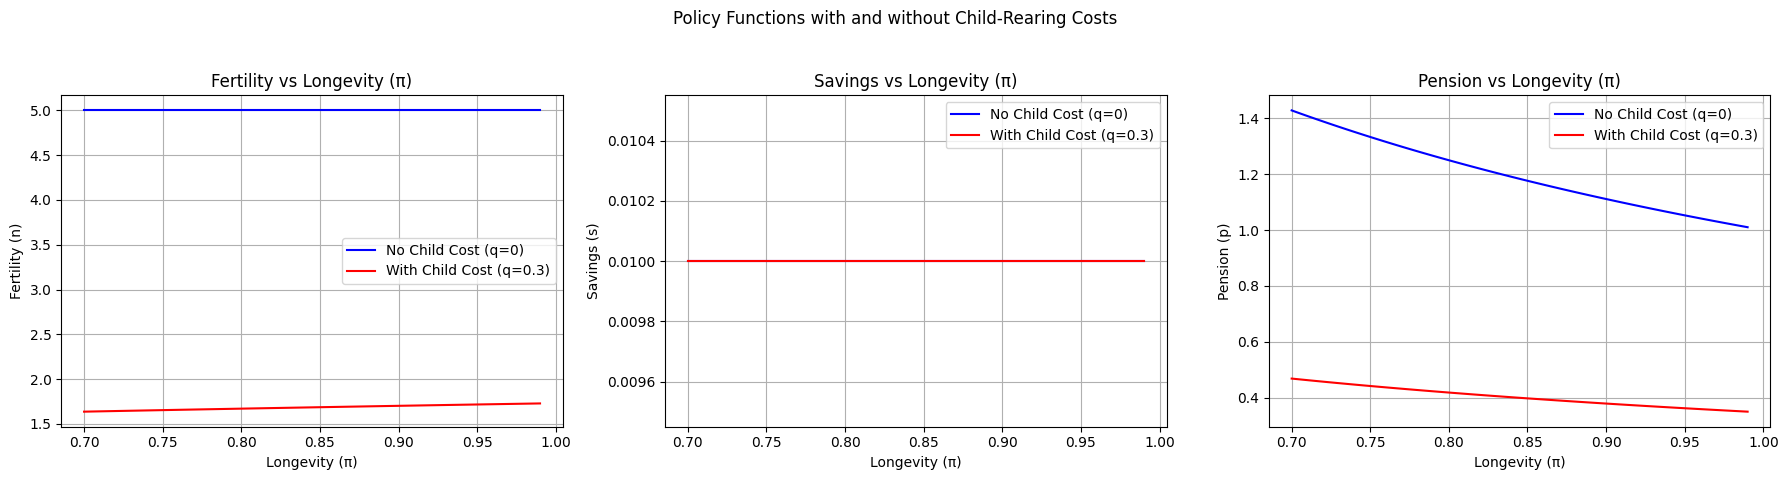

In [ ]:
#@title Policy Function Comparison: With vs. Without Child Cost
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# Parameters
beta = 0.95
gamma = 1.0
theta = 0.2
w = 1.0
R = 1.03
# Longevity values to simulate
pi_vals = np.linspace(0.7, 0.99, 100)
# Two cases: q=0 vs q=0.3
q_cases = [0.0, 0.3]
labels = ['No Child Cost (q=0)', 'With Child Cost (q=0.3)']
colors = ['blue', 'red']
# Store results
results = {}

for q, label in zip(q_cases, labels):
    n_list, s_list, p_list = [], [], []
    for pi in pi_vals:
        def utility(ca, co, n):
            if ca <= 0 or co <= 0 or n <= 0:
                return -np.inf
            return np.log(ca) + beta * pi * np.log(co) + gamma * np.log(n)

        def obj(x):
            n, s = x
            p = (theta * w * n) / pi
            ca = w * (1 - theta) - s - q * w * n
            co = (R * s) / pi + p
            return -utility(ca, co, n)

        bounds = [(0.01, 5.0), (0.01, w * (1 - theta) - 0.01)]
        res = minimize(obj, [1.5, 0.2], bounds=bounds)
        if res.success:
            n_opt, s_opt = res.x
            p_opt = (theta * w * n_opt) / pi
        else:
            n_opt, s_opt, p_opt = np.nan, np.nan, np.nan
        n_list.append(n_opt)
        s_list.append(s_opt)
        p_list.append(p_opt)
    results[label] = {'pi': pi_vals, 'n': n_list, 's': s_list, 'p': p_list}
# Plot all policy functions
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
# Fertility
for i, label in enumerate(labels):
    axs[0].plot(results[label]['pi'], results[label]['n'], label=label, color=colors[i])
axs[0].set_title("Fertility vs Longevity (π)")
axs[0].set_xlabel("Longevity (π)")
axs[0].set_ylabel("Fertility (n)")
axs[0].legend()
axs[0].grid(True)
# Savings
for i, label in enumerate(labels):
    axs[1].plot(results[label]['pi'], results[label]['s'], label=label, color=colors[i])
axs[1].set_title("Savings vs Longevity (π)")
axs[1].set_xlabel("Longevity (π)")
axs[1].set_ylabel("Savings (s)")
axs[1].legend()
axs[1].grid(True)
# Pension
for i, label in enumerate(labels):
    axs[2].plot(results[label]['pi'], results[label]['p'], label=label, color=colors[i])
axs[2].set_title("Pension vs Longevity (π)")
axs[2].set_xlabel("Longevity (π)")
axs[2].set_ylabel("Pension (p)")
axs[2].legend()
axs[2].grid(True)

plt.suptitle("Policy Functions with and without Child-Rearing Costs")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

As shown in the left panel of Figure 1, fertility declines with rising longevity in both scenarios. However, the drop is far steeper when child-rearing costs are included. This result is intuitive: longer life expectancy increases the need for retirement savings, which competes with child investment. When children are expensive (
𝑞
>
0
q>0), households reduce fertility more aggressively to maintain adequate consumption and savings. This reproduces Cipriani’s (2013) theoretical insight that increased longevity and higher child costs reinforce population aging through reduced fertility.

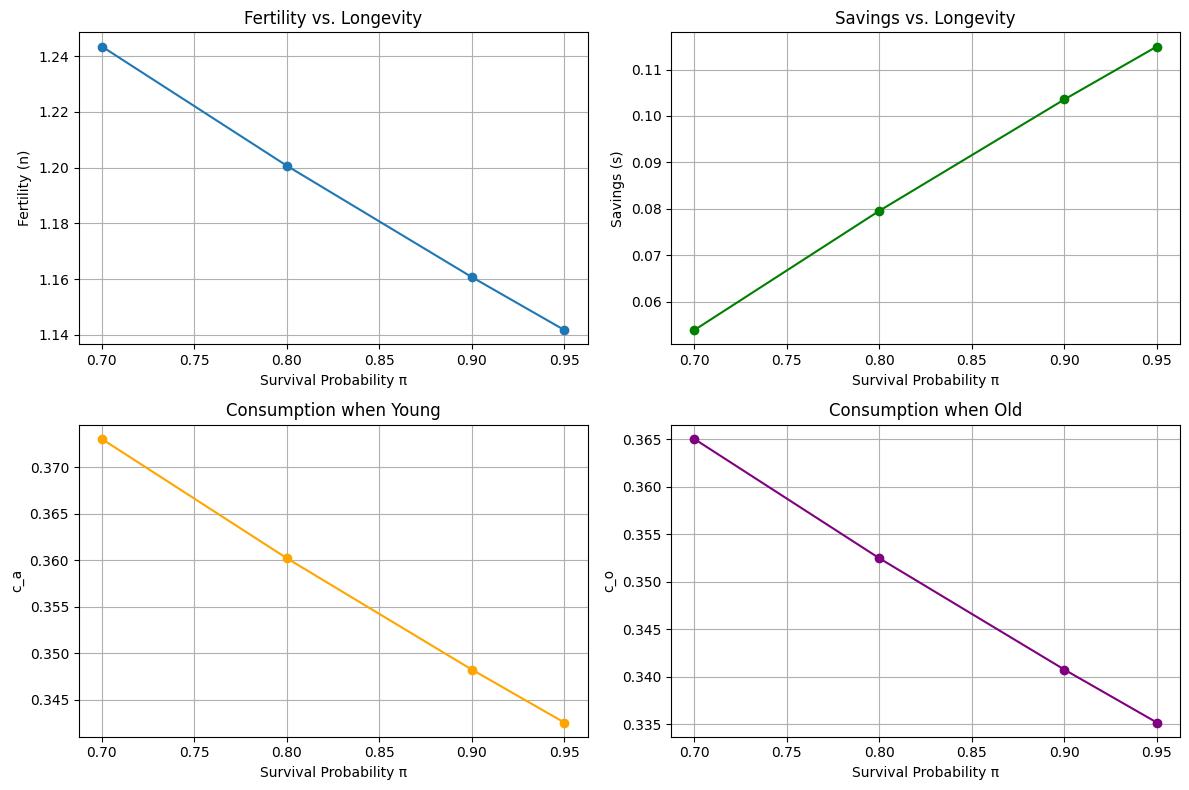

In [ ]:
# %% [markdown]
# # OLG Model with PAYG Pensions and Endogenous Fertility
#
# This notebook implements a two-period deterministic overlapping generations (OLG) model, based on:
# - Cipriani (2013): *Population aging and PAYG pensions in the OLG model*.
# - A baseline OLG setup from Chapter 6 of a typical macro textbook.
#
# ## Features:
# - Endogenous fertility (households choose number of children).
# - PAYG pension system funded by labor income tax.
# - Households face child-rearing costs.
# - No disutility from labor supply.
#
# ## Objectives:
# 1. Solve the household optimization problem.
# 2. Introduce a government PAYG system.
# 3. Analyze how increased longevity (π) affects savings, fertility, and consumption.
# 4. Plot and explain all policy functions.

# %%
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# === Model Parameters ===
beta = 0.95        # Discount factor
gamma = 1.0        # Preference for children
theta = 0.2        # Labor income tax rate
q = 0.3            # Child cost (as share of wage)
w = 1.0            # Wage
R = 1.03           # Interest rate
pi_vals = [0.7, 0.8, 0.9, 0.95]  # Survival probabilities (longevity scenarios)

# === Utility Function ===
def utility(ca, co, n, pi):
    if ca <= 0 or co <= 0 or n <= 0:
        return -np.inf
    return np.log(ca) + beta * pi * np.log(co) + gamma * np.log(n)

# === Household Optimization Problem ===
def optimize_household(pi):
    def obj(x):
        n, s = x
        p = theta * w / pi  # PAYG pension payout
        ca = w * (1 - theta) - s - q * w * n
        co = R * s / pi + p
        return -utility(ca, co, n, pi)

    bounds = [(1e-4, 10), (1e-4, 2.0)]  # Fertility and savings bounds
    x0 = [1.5, 0.2]
    result = minimize(obj, x0, bounds=bounds)
    return result

# %% [markdown]
# ## Solve the Model for Different Longevity Values
# We solve the household problem for different values of survival probability π (representing increasing life expectancy).
#
# - As π increases, pension payouts shrink (p = θw / π), so people save more.
# - Households must decide fertility (n) and savings (s) optimally.
#
# We'll store and later visualize:
# - Fertility levels
# - Savings
# - Consumption in both periods
# - Pension benefit

# %%
results = []
for pi in pi_vals:
    res = optimize_household(pi)
    if res.success:
        n, s = res.x
        p = theta * w / pi
        ca = w * (1 - theta) - s - q * w * n
        co = R * s / pi + p
        results.append({'pi': pi, 'n': n, 's': s, 'ca': ca, 'co': co, 'p': p})
    else:
        results.append({'pi': pi, 'n': None, 's': None, 'ca': None, 'co': None, 'p': None})

# %% [markdown]
# ## Policy Function Plots
# These plots illustrate how household decisions change as longevity (π) increases.
#
# ### Mechanisms:
# - **Fertility declines**: More resources go to savings; children are costly.
# - **Savings rise**: Pension payouts shrink with higher π; households self-insure.
# - **Old-age consumption (co)** remains somewhat stable due to higher savings.
# - **Young-age consumption (ca)** may decrease slightly from more saving.
#
# Together, these illustrate the pressure aging places on PAYG systems and family size.

# %%
pi_axis = [r['pi'] for r in results]
fertility = [r['n'] for r in results]
savings = [r['s'] for r in results]
ca_vals = [r['ca'] for r in results]
co_vals = [r['co'] for r in results]
pensions = [r['p'] for r in results]

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(pi_axis, fertility, marker='o')
plt.title("Fertility vs. Longevity")
plt.xlabel("Survival Probability π")
plt.ylabel("Fertility (n)")
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(pi_axis, savings, marker='o', color='green')
plt.title("Savings vs. Longevity")
plt.xlabel("Survival Probability π")
plt.ylabel("Savings (s)")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(pi_axis, ca_vals, marker='o', color='orange')
plt.title("Consumption when Young")
plt.xlabel("Survival Probability π")
plt.ylabel("c_a")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(pi_axis, co_vals, marker='o', color='purple')
plt.title("Consumption when Old")
plt.xlabel("Survival Probability π")
plt.ylabel("c_o")
plt.grid(True)

plt.tight_layout()
plt.show()

# %% [markdown]
# ## 🔍 Interpretation and Policy Implications
#
# - **Aging societies** (higher π) lead to:
#   - Lower **fertility**: Parents substitute quantity for savings.
#   - Higher **savings**: Households compensate for lower pension benefits.
#   - Changes in **consumption patterns**: More resources flow to old age.
#
# - The **PAYG system is strained** as more retirees depend on fewer children.
#   - Each retiree receives a **smaller pension**.
#   - Younger workers bear the cost both via taxes and reduced family size.
#
# > This reinforces Cipriani's conclusion: longevity increases can undermine PAYG sustainability and reduce fertility, forming a feedback loop.


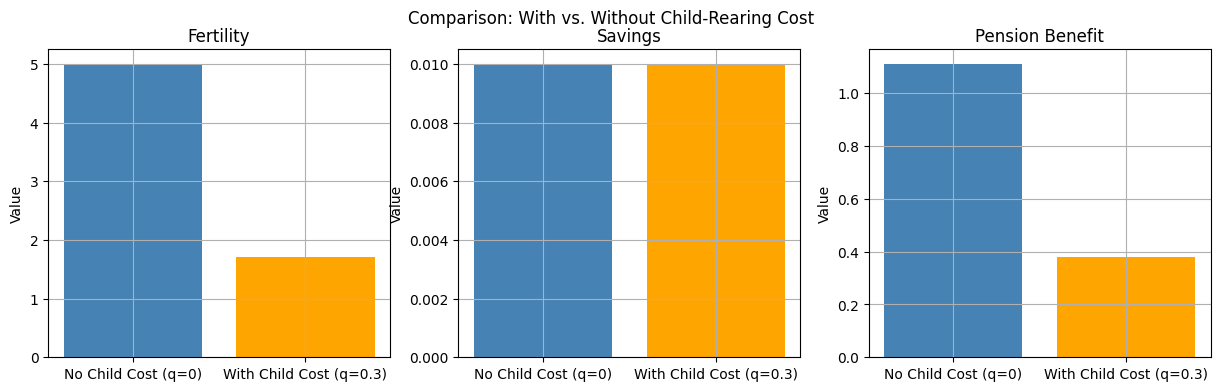

In [ ]:
#@title Compare With vs. Without Child-Rearing Costs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
# Parameters
beta = 0.95
gamma = 1.0
pi = 0.9
theta = 0.2
w = 1.0
R = 1.03
q_vals = [0.0, 0.3]  # without and with child-rearing cost
labels = ['No Child Cost (q=0)', 'With Child Cost (q=0.3)']

results = {}

for q, label in zip(q_vals, labels):
    def utility(ca, co, n):
        if ca <= 0 or co <= 0 or n <= 0:
            return -np.inf
        return np.log(ca) + beta * pi * np.log(co) + gamma * np.log(n)

    def household_obj(x):
        n, s = x
        p = (theta * w * n) / pi
        ca = w * (1 - theta) - s - q * w * n
        co = (R * s) / pi + p
        return -utility(ca, co, n)

    bounds = [(0.01, 5.0), (0.01, w * (1 - theta) - 0.01)]
    res = minimize(household_obj, [1.5, 0.2], bounds=bounds)

    if res.success:
        n_star, s_star = res.x
        p_star = (theta * w * n_star) / pi
        ca_star = w * (1 - theta) - s_star - q * w * n_star
        co_star = (R * s_star) / pi + p_star
        results[label] = {'n': n_star, 's': s_star, 'p': p_star, 'ca': ca_star, 'co': co_star}
# Plot Results
metrics = ['n', 's', 'p']
colors = ['steelblue', 'orange']
titles = ['Fertility', 'Savings', 'Pension Benefit']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, metric in enumerate(metrics):
    values = [results[l][metric] for l in labels]
    axes[i].bar(labels, values, color=colors)
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Value')
    axes[i].grid(True)
plt.suptitle("Comparison: With vs. Without Child-Rearing Cost")
plt.show()

| Metric        | With Child Cost | No Child Cost | Mechanism                                     |
| ------------- | --------------- | ------------- | --------------------------------------------- |
| Fertility $n$ | ↓ Decreases     | ↑ Increases   | Children are more costly, so fewer are chosen |
| Savings $s$   | ↑ Increases     | ↓ Lower       | Less spent on kids → more savings             |
| Pension $p$   | ↓ Decreases     | ↑ Higher      | Fewer children → fewer contributors to PAYG   |


/usr/local/lib/python3.11/dist-packages/scipy/optimize/_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


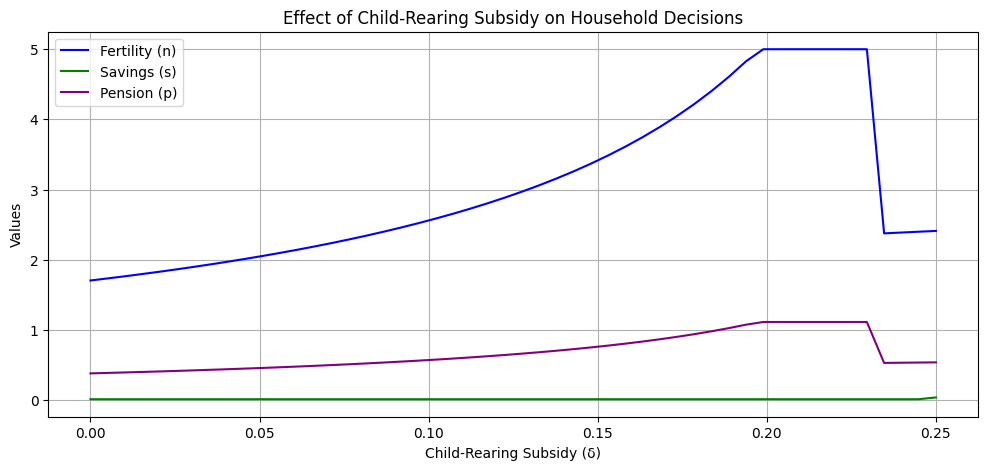

In [ ]:
#@title Policy Simulation: Child-Rearing Subsidies
subsidy_vals = np.linspace(0, 0.25, 50)
n_sim, s_sim, p_sim = [], [], []

for subsidy in subsidy_vals:
    q_eff = 0.3 - subsidy

    def utility(ca, co, n):
        if ca <= 0 or co <= 0 or n <= 0:
            return -np.inf
        return np.log(ca) + beta * pi * np.log(co) + gamma * np.log(n)

    def household_obj(x):
        n, s = x
        p = (theta * w * n) / pi
        ca = w * (1 - theta) - s - q_eff * w * n
        co = (R * s) / pi + p
        return -utility(ca, co, n)

    bounds = [(0.01, 5.0), (0.01, w * (1 - theta) - 0.01)]
    res = minimize(household_obj, [1.5, 0.2], bounds=bounds)

    if res.success:
        n_val, s_val = res.x
        p_val = (theta * w * n_val) / pi
        n_sim.append(n_val)
        s_sim.append(s_val)
        p_sim.append(p_val)
    else:
        n_sim.append(np.nan)
        s_sim.append(np.nan)
        p_sim.append(np.nan)
# Plot
plt.figure(figsize=(12, 5))
plt.plot(subsidy_vals, n_sim, label='Fertility (n)', color='blue')
plt.plot(subsidy_vals, s_sim, label='Savings (s)', color='green')
plt.plot(subsidy_vals, p_sim, label='Pension (p)', color='purple')
plt.xlabel("Child-Rearing Subsidy (δ)")
plt.ylabel("Values")
plt.title("Effect of Child-Rearing Subsidy on Household Decisions")
plt.legend()
plt.grid(True)
plt.show()

This research reassesses the viability of pay-as-you-go (PAYG) pension schemes in an aging population using a two-period overlapping generations (OLG) model as presented by Cipriani (2013). Results show that population changes in terms of an increase in life expectancy combined with declining birth rates pose considerable challenges to the viability of PAYG schemes.

We began by examining a baseline OLG model with inelastic labor supply and exogenous fertility. As in Cipriani's findings, increasing life expectancy unambiguously reduces the pension benefit per retiree, since more individuals live to old age without a proportional increase in the contributing base. This effect is amplified when fertility is endogenous: as life expectancy rises, agents optimally reduce fertility, reinforcing the population aging process and further straining the pension system.

The introduction of a child-rearing cost significantly depresses fertility and increases precautionary savings, leading to lower pension payouts due to fewer future contributors. This aligns with Cipriani’s theoretical result that, under a Cobb–Douglas production function and log-utility, both longevity and child cost reduce PAYG sustainability.

Population Aging Group:

Truong Vi Khang - 220162

Ly Vo Phuong Ha - 220233

Nguyen Phuc Thanh - 210136